In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve,accuracy_score, auc, average_precision_score, PrecisionRecallDisplay
%matplotlib inline

In [2]:
glass = pd.read_csv('glass.csv', encoding='iso-8859-1')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.size

2140

In [4]:
glass.drop_duplicates(keep = 'first', inplace = True )
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.size

2130

<AxesSubplot:>

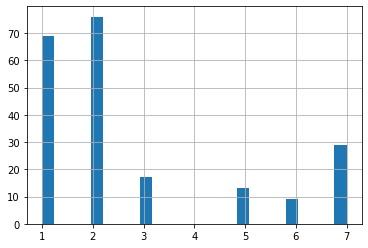

In [6]:
glass.Type.hist(bins = 25)

<AxesSubplot:>

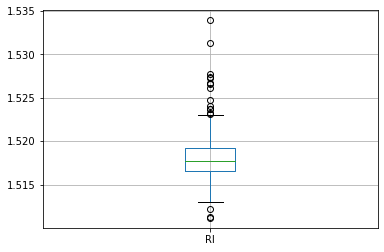

In [7]:
glass.boxplot('RI')

<AxesSubplot:>

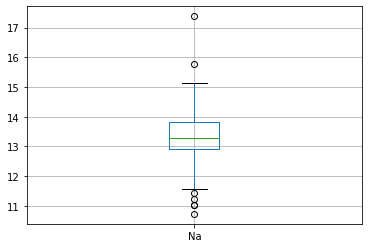

In [8]:
glass.boxplot('Na')

<AxesSubplot:>

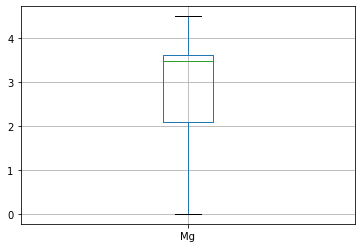

In [9]:
glass.boxplot('Mg')

<AxesSubplot:>

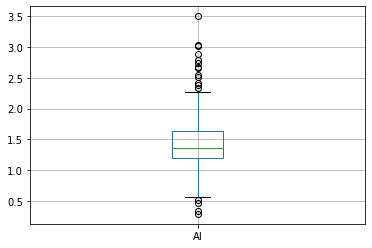

In [10]:
glass.boxplot('Al')

<AxesSubplot:>

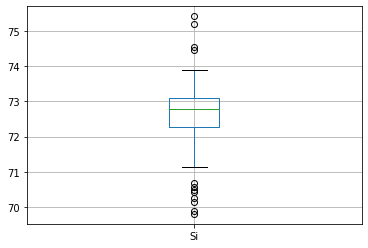

In [11]:
glass.boxplot('Si')

<AxesSubplot:>

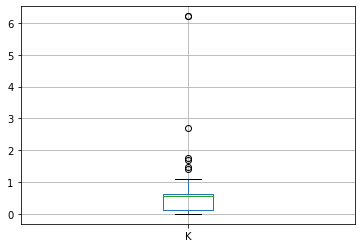

In [12]:
glass.boxplot('K')

<AxesSubplot:>

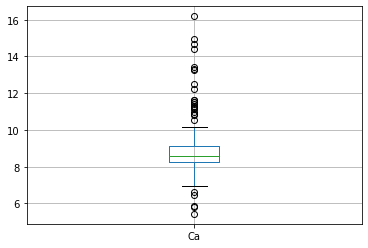

In [13]:
glass.boxplot('Ca')

<AxesSubplot:>

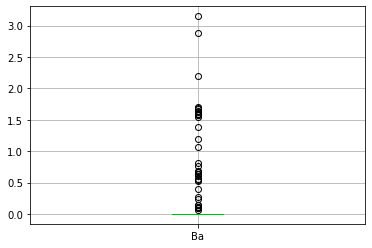

In [14]:
glass.boxplot('Ba')

<AxesSubplot:>

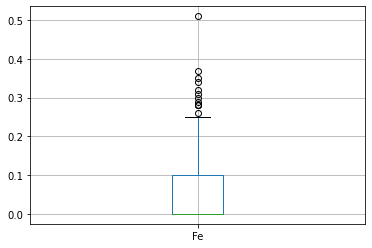

In [15]:
glass.boxplot('Fe')

<AxesSubplot:>

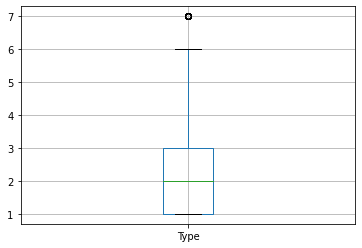

In [16]:
glass.boxplot('Type')

<AxesSubplot:>

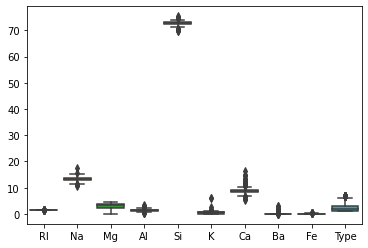

In [17]:
sns.boxplot(data = glass)

In [18]:
columns_num = [glass.columns[0:9]]
categ = [glass.columns[9]]
columns_num

[Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')]

In [19]:
categ

['Type']

<AxesSubplot:>

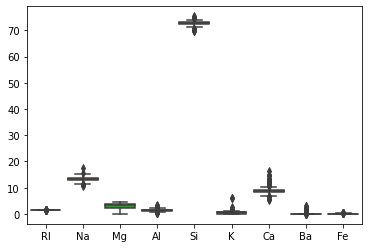

In [20]:
colt = glass.Type
glass_2 = glass.drop(columns = 'Type', axis = 1)
sns.boxplot(data = glass_2)

In [21]:
scaler = preprocessing.MinMaxScaler()
col = glass_2.columns
glass_2[col] = scaler.fit_transform(glass_2[col])
norm_glass = pd.DataFrame(glass_2, columns = col)
norm_glass['Type'] = colt
norm_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7


<AxesSubplot:>

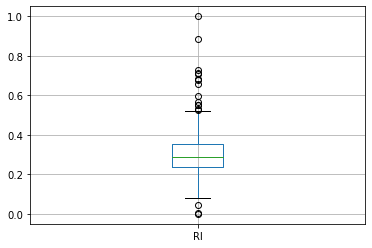

In [22]:
norm_glass.boxplot('RI')

<AxesSubplot:>

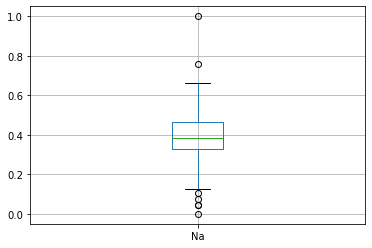

In [23]:
norm_glass.boxplot('Na')

<AxesSubplot:>

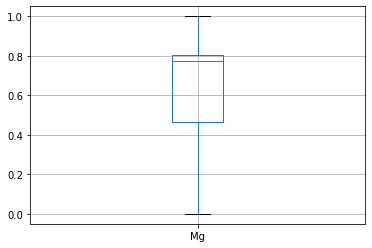

In [24]:
norm_glass.boxplot('Mg')

<AxesSubplot:>

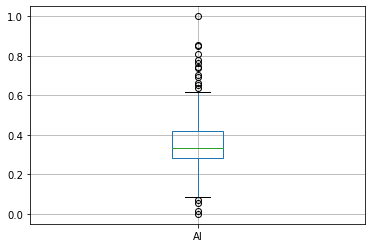

In [25]:
norm_glass.boxplot('Al')

<AxesSubplot:>

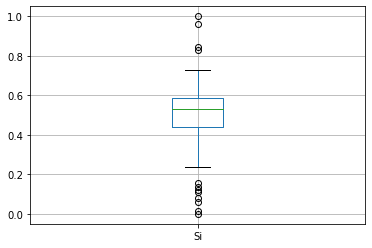

In [26]:
norm_glass.boxplot('Si')

<AxesSubplot:>

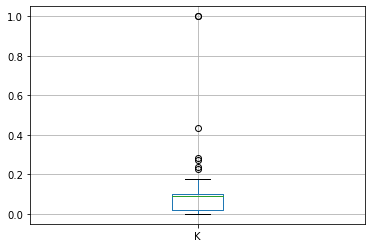

In [27]:
norm_glass.boxplot('K')

<AxesSubplot:>

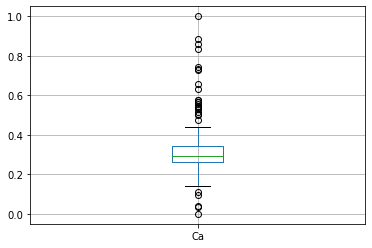

In [28]:
norm_glass.boxplot('Ca')

<AxesSubplot:>

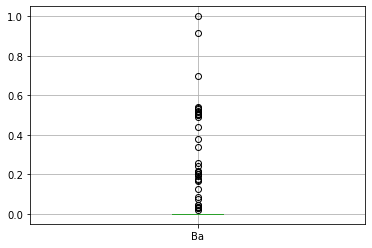

In [29]:
norm_glass.boxplot('Ba')

<AxesSubplot:>

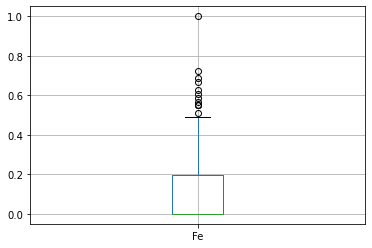

In [30]:
norm_glass.boxplot('Fe')

<AxesSubplot:>

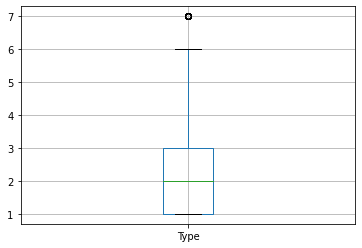

In [31]:
norm_glass.boxplot('Type')

<AxesSubplot:>

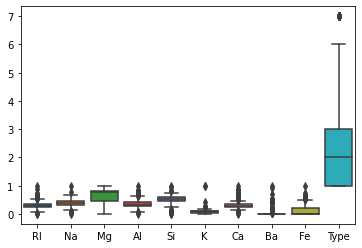

In [32]:
sns.boxplot(data = norm_glass)

In [33]:
norm_glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<AxesSubplot:>

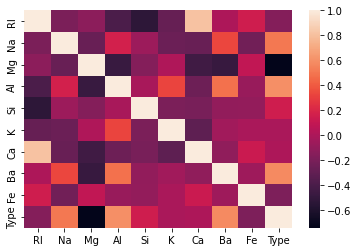

In [34]:
sns.heatmap(norm_glass.corr())

In [35]:
glass = glass.loc[glass['Type'] != 4]
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [36]:
x = norm_glass.drop('Type', axis = 1)
y = norm_glass['Type']
y_bin = label_binarize(y,classes =[0, 1, 2, 3, 4, 5, 6] )
n_classes = y_bin.shape[1]
print(y_bin)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
#perceptron
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
ppn = Perceptron()
ppn_grid = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 10)[1:],
    'max_iter': [x for x in range(1, 200)]
}, n_jobs=-1)

In [38]:
ppn_grid.fit(x_train, y_train)

C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


GridSearchCV(estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                      14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                      24, 25, 26, 27, 28, 29, 30, ...]})

In [39]:
alpha = ppn_grid.best_estimator_.alpha
print(alpha)
max_iter = ppn_grid.best_estimator_.max_iter
print(max_iter)

0.1111111111111111
8


In [40]:
ppn = Perceptron(alpha = alpha, max_iter=max_iter, penalty = 'l2')
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print('Accuracy', accuracy_score(y_test, ppn_predict))

Accuracy 0.13953488372093023


C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [41]:
cppn = CalibratedClassifierCV(ppn, cv = 7)
cppn.fit(x_train, y_train)

C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence.

CalibratedClassifierCV(base_estimator=Perceptron(alpha=0.1111111111111111,
                                                 max_iter=8, penalty='l2'),
                       cv=7)

In [42]:
cppn_predict = cppn.predict(x_test)
cppn_predict
print('Accuracy', accuracy_score(y_test, cppn_predict) )

Accuracy 0.4186046511627907


Text(0.5, 1.0, 'ROC curve')

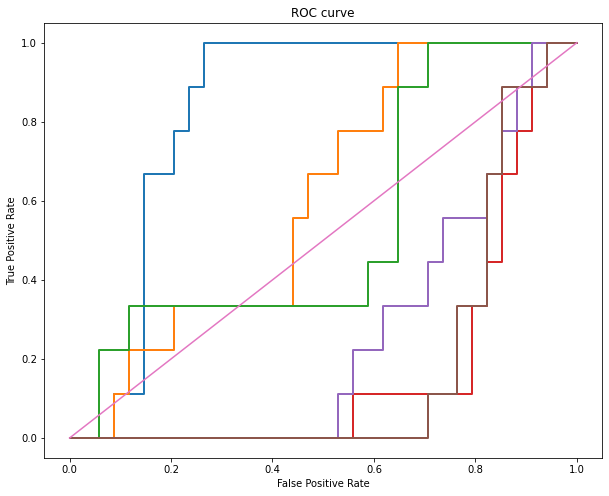

In [43]:
y_score = cppn.predict_proba(x_test)
plt.figure(figsize=(10, 8))
fpr1, tpr1, _ = roc_curve(y_test, y_score[:,0], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:,1], pos_label=1)
fpr3, tpr3, _ = roc_curve(y_test, y_score[:,2], pos_label=1)
fpr4, tpr4, _ = roc_curve(y_test, y_score[:,3], pos_label=1)
fpr5, tpr5, _ = roc_curve(y_test, y_score[:,4], pos_label=1)
fpr6, tpr6, _ = roc_curve(y_test, y_score[:,5], pos_label=1)
##fpr7, tpr7, _ = roc_curve(y_test, y_score[:,6], pos_label=1)

lw = 2
plt.plot(fpr1, tpr1, lw=lw, label='ROC curve ')
plt.plot(fpr2, tpr2, lw=lw)
plt.plot(fpr3, tpr3, lw=lw)
plt.plot(fpr4, tpr4, lw=lw)
plt.plot(fpr5, tpr5, lw=lw)
plt.plot(fpr6, tpr6, lw=lw)

plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

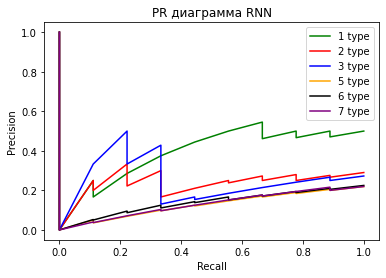

In [44]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score[:,0],pos_label=1)
precision2, recall2, _ = precision_recall_curve(y_test, y_score[:,1],pos_label=1)
precision3, recall3, _ = precision_recall_curve(y_test, y_score[:,2],pos_label=1)
precision4, recall4, _ = precision_recall_curve(y_test, y_score[:,3],pos_label=1)
precision5, recall5, _ = precision_recall_curve(y_test, y_score[:,4],pos_label=1)
precision6, recall6, _ = precision_recall_curve(y_test, y_score[:,5],pos_label=1)

plt.plot( recall1, precision1, color = "green", label = "1 type")    
plt.plot( recall2, precision2, color = "red", label = "2 type")    
plt.plot( recall3, precision3, color = "blue", label = "3 type")
plt.plot( recall4, precision4, color = "orange", label = "5 type")    
plt.plot( recall5, precision5, color = "black", label = "6 type")    
plt.plot( recall6, precision6, color = "purple", label = "7 type") 

plt.title('PR диаграмма RNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'upper right')

In [45]:
#knn

In [73]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
y_pred = knn.predict(x_test)
print(y_pred[:5])

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]]


In [75]:
print(y_test[:5])

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]]


In [76]:
print(accuracy_score(y_test, y_pred))

0.6511627906976745


In [77]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, x, y_bin, cv = kf, scoring = 'accuracy')
print('массив значений метрики', scores)
print('Средняя метрика', np.mean(scores))

массив значений метрики [0.65116279 0.53488372 0.6744186  0.61904762 0.61904762]
Средняя метрика 0.6197120708748616


In [78]:
knn_params = {'n_neighbors': np.arange(0,10)}
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
knn_grid = GridSearchCV(knn, knn_params, cv = kf, scoring = 'accuracy')
knn_grid.fit(x_train, y_train)

C:\Users\Max\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Max\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Max\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\Max\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Max\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [79]:
print(knn_grid.best_params_)

{'n_neighbors': 1}


In [80]:
print(knn_grid.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [81]:
print(knn_grid.best_score_)

0.6529411764705882


C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


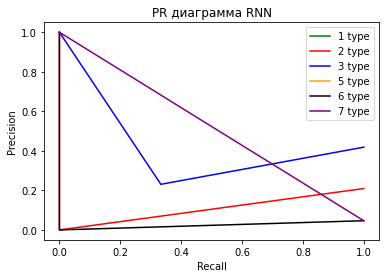

In [82]:
#PR
y_score = knn_grid.predict_proba(x_test)
precision = {}
recall = {}

for i in range(n_classes):
    if i == 7: continue
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[i][:,0])

plt.plot( recall[0], precision[0], color = "green", label = "1 type")    
plt.plot( recall[1], precision[1], color = "red", label = "2 type")    
plt.plot( recall[2], precision[2], color = "blue", label = "3 type")
plt.plot( recall[4], precision[4], color = "orange", label = "5 type")    
plt.plot( recall[5], precision[5], color = "black", label = "6 type")    
plt.plot( recall[6], precision[6], color = "purple", label = "7 type") 

plt.title('PR диаграмма RNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'upper right')

C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


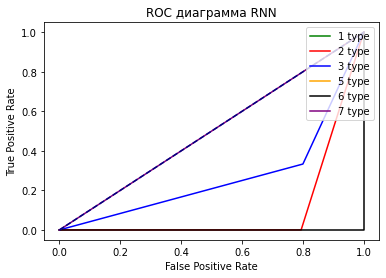

In [83]:
# ROC
fpr = {}
tpr = {}

for i in range(n_classes):
    if i == 7: continue
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:,0])

plt.plot( fpr[0], tpr[0], color = "green", label = "1 type")    
plt.plot( fpr[1], tpr[1], color = "red", label = "2 type")    
plt.plot( fpr[2], tpr[2], color = "blue", label = "3 type")
plt.plot( fpr[4], tpr[4], color = "orange", label = "5 type")    
plt.plot( fpr[5], tpr[5], color = "black", label = "6 type")    
plt.plot( fpr[6], tpr[6], color = "purple", label = "7 type") 

plt.title('ROC диаграмма RNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], color = 'Navy', linestyle = "--")

In [69]:
#oneVSrest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state = 0)
classifier = OneVsRestClassifier(
    make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier())
)
classifier.fit(x_train, y_train)
y_score = classifier.predict_proba(x_test)

C:\Users\Max\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\Max\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 4 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


In [71]:
precision = dict()
recall = dict()
average_precision = dict()

C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\Max\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


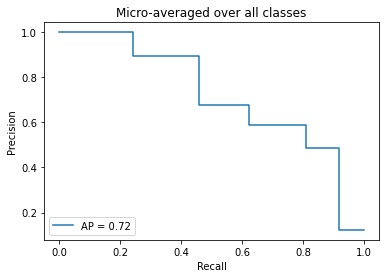

In [72]:
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")